# Topple maps

#### (Created behind the scenes when generating the identity element)

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


Define necessary functions for creating / visualising topple maps 

In [2]:
# Void inclusive avalanche operator
def cascader_void(N, sand_matrix, voids):
    inter_matrix = np.zeros((N+2,N+2), dtype=int)
    topple_map = sand_matrix // 4 
    UP = np.s_[0:N, 1:N+1]
    DOWN = np.s_[2:N+2, 1:N+1]
    LEFT = np.s_[1:N+1, 0:N]
    RIGHT = np.s_[1:N+1, 2:N+2]
    MIDDLE = np.s_[1:N+1, 1:N+1]
    inter_matrix[UP] += topple_map
    inter_matrix[DOWN] += topple_map
    inter_matrix[LEFT] += topple_map
    inter_matrix[RIGHT] += topple_map
    inter_matrix = inter_matrix[MIDDLE]

    #update sand matrix
    sand_matrix += inter_matrix
    sand_matrix -= 4*topple_map

    # This is slow but works for the small numbers we are working with
    for i in range(len(voids)):
        void = voids[i]
        sand_matrix[void[0]][void[1]] = 0

In [3]:
# Avalanche operator which supports N / voids, that returns the topple map
def cascader_void_topple(N, sand_matrix, voids):
    inter_matrix = np.zeros((N+2,N+2), dtype=int)
    topple_map = sand_matrix // 4 
    UP = np.s_[0:N, 1:N+1]
    DOWN = np.s_[2:N+2, 1:N+1]
    LEFT = np.s_[1:N+1, 0:N]
    RIGHT = np.s_[1:N+1, 2:N+2]
    MIDDLE = np.s_[1:N+1, 1:N+1]
    inter_matrix[UP] += topple_map
    inter_matrix[DOWN] += topple_map
    inter_matrix[LEFT] += topple_map
    inter_matrix[RIGHT] += topple_map
    inter_matrix = inter_matrix[MIDDLE]

    #update sand matrix
    sand_matrix += inter_matrix
    sand_matrix -= 4*topple_map

    # This is slow but works for the small numbers we are working with
    for i in range(len(voids)):
        void = voids[i]
        sand_matrix[void[0]][void[1]] = 0

    return topple_map

In [4]:
# A function to get a specific topple map at pos = a.
def get_topple_map(N, void_config, pos):
    # Define void-inclusive matrix pre-topple
    void_shape = np.zeros((N,N), dtype=int)
    for k in range(len(void_config)):
        vs = void_config[k]
        void_shape[vs[0]][vs[1]] += 1

    build = np.ones((N, N), dtype=int)
    build2 = build - void_shape
    ident = build2 * 6
    ident2 = build2 * 6

    # empty topple map
    topple_time = np.zeros((N,N), dtype=int)


    # Topple to get (2p)^o, check for pos (position)
    count = 0
    while np.any(ident >= 4):
        if count != pos:
            cascader_void(N, ident, void_config)
        else:
            topple_time = cascader_void_topple(N, ident, void_config)
            return topple_time
        count += 1

    # Topple to get G (identity matrix)
    ident3 = ident2 - ident
    count2 = 0
    while np.any(ident3 >= 4):
        if (count + count2) != pos:
            cascader_void(N, ident3, void_config)
        else:
            topple_time = cascader_void_topple(N, ident3, void_config)
            return topple_time
        count2 += 1

    # Incase the pos entered is too high
    return (count + count2)

In [5]:
# Find out how many unique topple maps there are for some given N / void configuration
def get_topple_number(N, void_config):
    # Define void-inclusive matrix pre-topple
    void_shape = np.zeros((N,N), dtype=int)
    for k in range(len(void_config)):
        vs = void_config[k]
        void_shape[vs[0]][vs[1]] += 1

    build = np.ones((N, N), dtype=int)
    build2 = build - void_shape
    ident = build2 * 6
    ident2 = build2 * 6

    # empty topple map
    topple_time = np.zeros((N,N), dtype=int)


    # Topple to get (2p)^o, check for pos (position)
    count = 0
    while np.any(ident >= 4):
        cascader_void(N, ident, void_config)
        count += 1

    # Topple to get G (identity matrix)
    ident3 = ident2 - ident
    count2 = 0
    while np.any(ident3 >= 4):
        cascader_void(N, ident3, void_config)
        count2 += 1

    # Incase the pos entered is too high
    return (count + count2)

#### Example of how these functions work and what topple maps look like:

In [6]:
get_topple_number(100, [])

6629

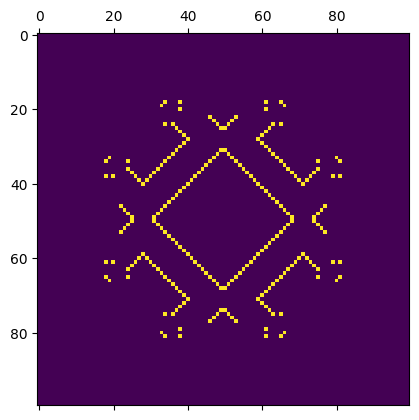

In [7]:
my_topple = get_topple_map(100, [], 6550)
plt.matshow(my_topple)

### Code to create an animation of all the topple maps:

In [8]:
# Avalanche operator for the evolving_fractal_gif2 function
def cascader_updated_I5(N, sand_matrix, voids):
    inter_matrix = np.zeros((N+2,N+2), dtype=int)
    topple_map = sand_matrix // 4 
    UP = np.s_[0:N, 1:N+1]
    DOWN = np.s_[2:N+2, 1:N+1]
    LEFT = np.s_[1:N+1, 0:N]
    RIGHT = np.s_[1:N+1, 2:N+2]
    MIDDLE = np.s_[1:N+1, 1:N+1]
    inter_matrix[UP] += topple_map
    inter_matrix[DOWN] += topple_map
    inter_matrix[LEFT] += topple_map
    inter_matrix[RIGHT] += topple_map
    inter_matrix = inter_matrix[MIDDLE]

    #update sand matrix
    sand_matrix += inter_matrix
    sand_matrix -= 4*topple_map

    topple_map = 2*topple_map
    for i in range(len(voids)):
        void = voids[i]
        sand_matrix[void[0]][void[1]] = 0
        topple_map[void[0]][void[1]] = 1

    return topple_map

In [9]:
import matplotlib.pyplot as plt
import os
import time
from PIL import Image


def evolving_fractal_gif2(N, voids, gif_path, duration=500):
    # Initialise Identity and topple matrices
    void_shape = np.zeros((N,N), dtype=int)
    for k in range(len(voids)):
        vs = voids[k]
        void_shape[vs[0]][vs[1]] += 1

    build = np.ones((N, N), dtype=int)
    build2 = build - void_shape
    ident = build2 * 6
    ident2 = build2 * 6
    topple_time = np.zeros((N, N), dtype=int)
    
    # Temporary list to store the image paths
    image_paths = []
    
    # Visualize
    count = 0
    while np.any(ident >= 4):
        topple_time = cascader_updated_I5(N, ident, voids)
        plt.matshow(topple_time)
            
        # Save the image to a temporary path
        temp_path = f"temp_matshow_{count}.png"
        plt.savefig(temp_path)
        plt.close()
        image_paths.append(temp_path)

        count += 1
    
    ident3 = ident2 - ident
    topple_time = np.zeros((N, N), dtype=int)

    count2 = 1 
    while np.any(ident3 >= 4):
        topple_time = cascader_updated_I5(N, ident3, voids)
        plt.matshow(topple_time)
            
        # Save the image to a temporary path
        temp_path = f"temp_matshow_{count+count2}.png"
        plt.savefig(temp_path)
        plt.close()
        image_paths.append(temp_path)
        
        count2 += 1

    # Create a list of PIL images
    images = [Image.open(img_path) for img_path in image_paths]
    
    # Save as GIF
    images[0].save(gif_path, save_all=True, append_images=images[1:], duration=duration, loop=0)
    
    # Clean up temporary files
    for img_path in image_paths:
        os.remove(img_path)


Run this animation code, change N or gif_path. Warning, this code is very slow.

In [11]:
if __name__ == "__main__":
    N = 30  # Example matrix size
    gif_path = "topple_evolution.gif"
    
    new_idenity = evolving_fractal_gif2(N, [], gif_path, duration=500)
